In [35]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt


def split_numerical_categorical(name):
    try:
        numerical = [feature for feature in name.columns if name[feature].dtype != 'O']
        categorical = [feature for feature in name.columns if name[feature].dtype == 'O']
        return numerical, categorical
    except AttributeError:
        return "Not type pd.DataFrame"



path= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
Data = pd.read_csv(path)
Data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [36]:
# Separate data into independent and dependent variable(s).
X = Data.drop(columns=['Drug'])
y = Data['Drug']

# Split data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Separate X_train into numerical and categorical features
numerical_features, categorical_features = split_numerical_categorical(X_train)

In [37]:
preprocessor = ColumnTransformer([
    ("scalar", StandardScaler(), numerical_features),
    ("Encoder", OneHotEncoder(sparse_output=False, drop="first"), categorical_features)
])

pipeline_tree = Pipeline([
    ("preprocessor", preprocessor),
    ("model", DecisionTreeClassifier(criterion="entropy", max_depth=3)),
])

In [38]:
# We can view how this Column Transformer affects our scales and decodes our data using:
X_train_transformed = preprocessor.fit_transform(X_train)
columns = preprocessor.get_feature_names_out()
X_train_transformed = pd.DataFrame(X_train_transformed, columns=columns)
X_train_transformed

,scalar__Age,scalar__Na_to_K,Encoder__Sex_M,Encoder__BP_LOW,Encoder__BP_NORMAL,Encoder__Cholesterol_NORMAL
0,-1.697812,-0.550278,1.0,1.0,0.0,0.0
1,-0.161397,0.741886,0.0,0.0,0.0,0.0
2,-0.693233,2.523441,0.0,1.0,0.0,0.0
3,0.134067,-0.821017,1.0,1.0,0.0,0.0
4,0.665903,1.365645,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
155,1.611389,0.065611,1.0,1.0,0.0,0.0
156,-1.520533,1.447782,0.0,0.0,0.0,1.0
157,1.138646,1.415156,0.0,1.0,0.0,1.0
158,1.138646,0.727004,1.0,0.0,0.0,1.0


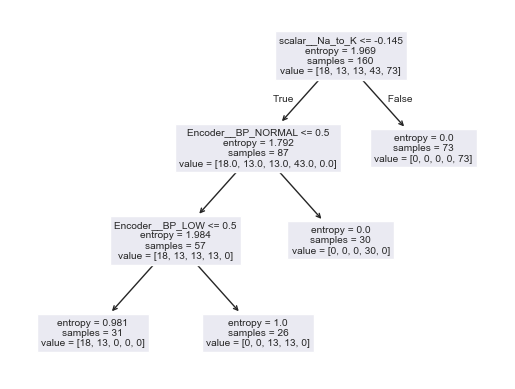

[]

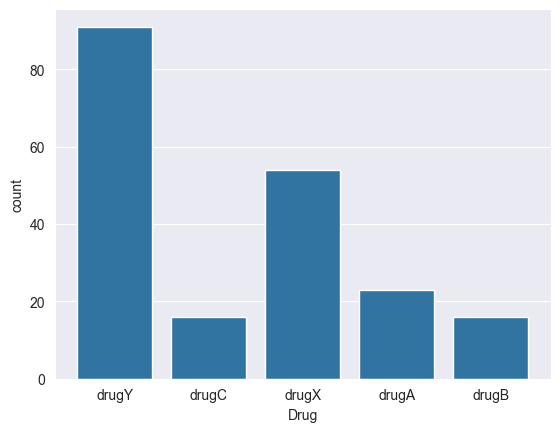

In [46]:
pipeline_tree.fit(X_train, y_train)
plot_tree(pipeline_tree["model"], feature_names=preprocessor.get_feature_names_out())
plt.show()

y_classes = sns.countplot(data = Data, x = 'Drug')
y_classes.plot()

In [47]:
kfold = StratifiedKFold(n_splits=13, shuffle=True, random_state=42)
f1_macro_average = cross_val_score(pipeline_tree, X_train, y_train, cv=kfold, scoring="f1_macro").mean()
f1_macro_average


np.float64(0.5958241758241758)